## Digester
Un digester est une usine qui produit du papier ou carton à partir du bois.

### Description des données
Nom du fichier: `digester_data.csv`

Il y a environ un mois de données dans ce fichier (5968 lignes). 
Les données sont enregistrées toutes les 10 minutes.

Il y a 37 colonnes dans ce dataset. Ce sont toutes des mesures provenant de capteurs dans l'usine.  
La plus improtante est `Blow Kappa` qui mesure la qualité de la production.  
**L'objectif est de prédire ce `Blow Kappa` en utilisant les autres capteurs.**

In [99]:
import pandas
import sklearn
from sklearn.linear_model import LogisticRegression


In [100]:
# Loading dataset

data = pandas.read_csv('digester_data.csv', index_col=0, parse_dates=True)
data.head()

,Wash Filtrate to Digester - Total Flow,Wash Filtrate Vertical Nozzle,White Liquor Flow to ITC,H-factor,H-factor Co-Current,H-factor Target,H-factor Counter-Current,Volumetric Chip Flow,Chip Mass Flow from Piles,Spruce Saw Mill Chips Share,...,Hot Spent Digester Liquor Specific Flow to Impregnation Vessel,Digester Production,Digester Long Level,Digester Chip Level Control,Digester Dilution Factor,Digester Short Level,Blow Kappa,Blow Temperature,Blow Production,Weak Black Liquor to Evaporation Plant Residual Alkali
Time,,,,,,,,,,,,,,,,,,,,,
2018-11-17 05:30:00,110.2245,99.17144,0.666082,654.5113,343.3514,640.0,311.1599,562.5585,28.57158,0.0,...,2.700000,900.7260,88.44555,18.03286,2.087241,48.00631,27.06810,81.31033,944.3789,9.08
2018-11-17 05:40:00,110.1122,98.94392,0.664136,661.8202,346.3676,640.0,315.4526,633.1141,32.40237,0.0,...,2.700000,901.0746,88.48584,16.11140,2.120218,48.22581,26.91316,81.29632,935.1744,9.08
2018-11-17 05:50:00,110.5644,99.35569,0.663386,641.0970,347.7459,640.0,293.3511,639.0107,32.13532,0.0,...,2.700000,901.1793,88.58454,19.01828,2.094056,48.28634,26.75613,81.33907,943.5457,9.08
2018-11-17 06:00:00,111.6846,100.51020,0.667563,636.6735,340.1161,640.0,296.5574,566.5072,28.39081,0.0,...,2.699660,901.0532,88.60841,19.94156,2.074880,48.21948,26.29543,81.32839,942.8271,9.08
2018-11-17 06:10:00,113.5258,101.86900,0.683108,648.1323,344.1459,640.0,303.9865,476.2530,24.19455,0.0,...,2.675004,930.5841,88.82150,16.25405,2.121525,48.34011,25.98184,81.47342,959.3496,9.08


C:\Users\simon.meier\AppData\Local\Temp\ipykernel_15268\2686409476.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['thirdday'] = data.index.hour // 8


,Blow Kappa,thirdday
Time,,
2018-11-17 05:30:00,27.06810,0
2018-11-17 05:40:00,26.91316,0
2018-11-17 05:50:00,26.75613,0
2018-11-17 06:00:00,26.29543,0
2018-11-17 06:10:00,25.98184,0
...,...,...
2018-12-28 15:20:00,24.98035,1
2018-12-28 15:30:00,25.20084,1
2018-12-28 15:40:00,25.26461,1


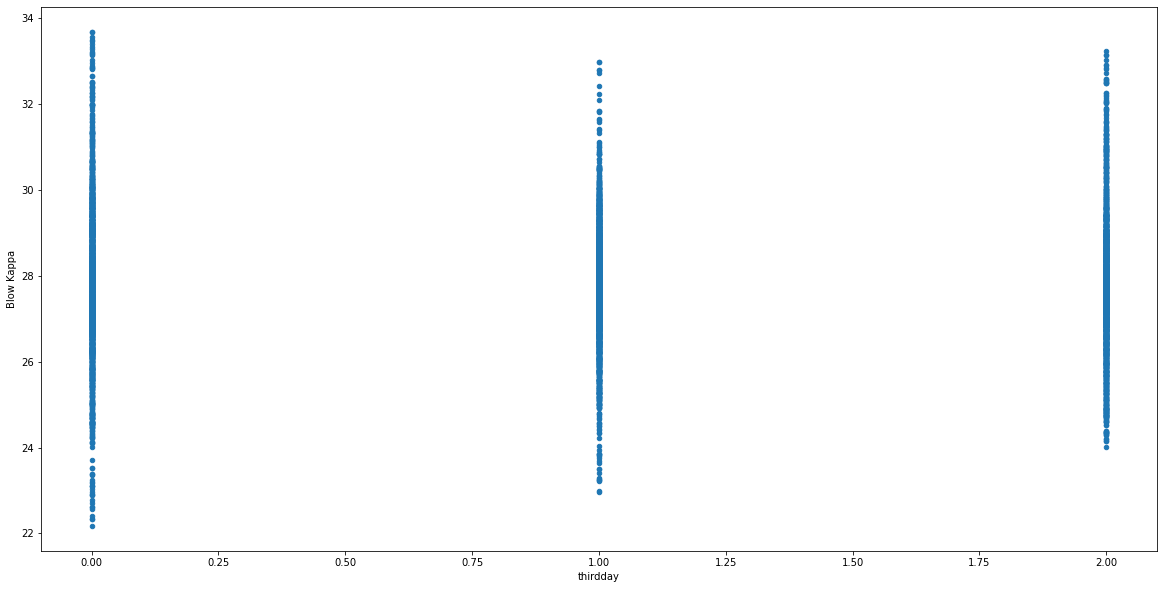

In [121]:
# Building model


# data['Blow Kappa'].plot(figsize=(20, 10))

dataframe = data[['Blow Kappa']]

# qd = quarter day
# data.head()

dataframe['thirdday'] = data.index.hour // 8

feature_cols = ['Blow Kappa', 'thirdday']

dataframe.plot(y='Blow Kappa', x='thirdday', figsize=(20, 10), kind='scatter')

y = dataframe[feature_cols]
X = dataframe['Blow Kappa']

dataframe

# dataframe['Blow Kappa'].plot(figsize=(20, 10))
# print(data['2018-12-10':'2018-12-11'])
# mean = data.resample('1h').mean()
# mean



In [122]:

logreg = LogisticRegression()



logreg.fit(X.to_numpy(), y.to_numpy())

ValueError: Expected 2D array, got 1D array instead:
array=[27.0681  26.91316 26.75613 ... 25.26461 25.71346 25.78901].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.